## Assignment 1

**Jackson Rudoff**
Projects in Machine Learning
February 7, 2023
 

### Reviewing the Data

The World Happiness Data includes an interesting mix of data. The numeric features are a collection of observed variables, taken by the researchers to regress against respondents' answers to an assessment of Life Evaluation. The categorical features are all geographical, simply denoting respondent's country, region, and sub-region.

Taking a look at the data:

In [3]:
import pandas as pd
from zipfile import ZipFile

with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:
  
    zObject.extractall()

X_train = pd.read_csv("world_happiness_competition_data\X_train.csv")
X_test = pd.read_csv("world_happiness_competition_data\X_test.csv")
y_train = pd.read_csv("world_happiness_competition_data\y_train.csv")
y_train_labels = y_train.idxmax(axis=1) # so we know what the heck is going on

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111


In [4]:
#load the preprocessor

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

preprocess=preprocessor.fit(X_train) 



In [5]:
# Get feature names 

temp_pipe = Pipeline([('Preprocessing', preprocessor)])
one_hot_names = temp_pipe['Preprocessing'].transformers_[1][1]\
    ['onehot'].get_feature_names().tolist()
one_hot_names

['x0_Africa',
 'x0_Americas',
 'x0_Asia',
 'x0_Europe',
 'x0_Oceania',
 'x1_Australia and New Zealand',
 'x1_Central Asia',
 'x1_Eastern Asia',
 'x1_Eastern Europe',
 'x1_Latin America and the Caribbean',
 'x1_Northern Africa',
 'x1_Northern America',
 'x1_Northern Europe',
 'x1_South-eastern Asia',
 'x1_Southern Asia',
 'x1_Southern Europe',
 'x1_Sub-Saharan Africa',
 'x1_Western Asia',
 'x1_Western Europe']

In [6]:
# make function

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

# make labeled features

processed_X = preprocessor(X_train)
X_train_labels = pd.DataFrame(processed_X, columns = numeric_features + one_hot_names)
X_train_labels.head()
  

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Terrorist_attacks,x0_Africa,x0_Americas,x0_Asia,...,x1_Latin America and the Caribbean,x1_Northern Africa,x1_Northern America,x1_Northern Europe,x1_South-eastern Asia,x1_Southern Asia,x1_Southern Europe,x1_Sub-Saharan Africa,x1_Western Asia,x1_Western Europe
0,0.104445,0.206031,0.458311,0.486237,-0.997766,-0.858243,-0.366739,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.543882,0.380595,0.377911,0.357819,0.150055,0.115273,-0.225145,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.643092,-0.197863,1.071894,-2.005071,-1.812032,-0.790096,-0.243054,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.869063,0.339521,0.530249,1.128327,0.346264,0.504679,-0.314984,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.419579,1.078853,0.043614,1.616315,1.346928,1.215346,-0.225145,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Notably, the numeric features also need some scaling, largely due to the Terrorist_attacks variable. 

### 1 - Bivariate Analysis
Let's see how each variable relates to our target, "Happiness" (which is in this case a dummy-coded categorical outcome).

There's a few ways we could do this, but maybe to start off it would be good to get a picture of the features' covariance. This will allow us to better understand the relationships between our features.



![covariance](covariance_new.jpg)

Already some very interesting findings here. Most notably, we can see the (perhaps unsurprising) negative association between the group of `[GDP per cap, Life exptectancy, generosity]` and `Terrorist attacks`. This information will be useful as I start fitting the model and evaluating features. 

Another element of this matrix worth noting is the lack of covariance between region and the numeric variables, aside from `Africa` and `Sub-Saharan Africa`. This points toward a distribution `Happiness` values that is heavily concentrated toward the lower end.

I also want to take a look at the distribution of `Happiness` values by region. 


![covariance](region_plot.png)
![covariance](hist.jpg)

We're again seeing a pattern here of `Africa` being distributed toward lower scores. I also find it interesting, however, that Asia has a shomewhat normal distribution of `Happiness` values.


What if we go by sub-region?


![covariance](sub_region_plot.jpg)

Sub-Saharan Africa really is what drags down the larger region in terms of `Happiness`. 

I want to take a look as well at some of the numeric features. Given how these were derived - and what some of them represent - I am guessing the interactions will not be too surprising. For example, with `GDP`:

![gdp](per_cap.png)
!![gdp](scatter_gdp.png)

As one would expect, having a higher average `GDP` will correspond to a higher mean `Happiness` score. Mapped with regionality, we can see why African states tend to score lower, as they tend towards the bottom of `GDP`, which is evidently a strong individual predictor of `Happiness`. 

Things get a little more noisy, however, with `Freedom`, `Perceptions of Corruption`, and `Generosity`:

![free](free_plot.png)
![poc](p_o_c.png)
![geno](generosity_plot.png)

In these cases, we see some less straightforward distributions. Particularly with `Generosity`, there's a U-shape `Happiness` may be indicative of some trouble ahead when incorporating that feature.

### 2 - Feature Examination/Selection

With this all established, it's clear that we likely will want to eliminate features from our model at some point. For example, if we take a look at a table of feature importances from one of my initial test models:

In [9]:
from sklearn.ensemble import RandomForestClassifier

params = {'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 100}


first_model = RandomForestClassifier(**params, random_state = 0)
first_model.feature_names = list(X_train_labels.columns.values)
first_model.fit(X_train_labels, y_train_labels) # Fitting to the training set.
first_model.score(X_train_labels, y_train_labels) # Fit score, 0-1 scale.


feat_importances = pd.DataFrame(data = first_model.feature_importances_, columns= ['Importance'], \
                                index=first_model.feature_names).reset_index().sort_values(by = "Importance", ascending = False)

feat_importances


,index,Importance
0,GDP per capita,0.153665
2,Healthy life expectancy,0.142748
1,Social support,0.137618
5,Perceptions of corruption,0.108789
3,Freedom to make life choices,0.097828
4,Generosity,0.087371
6,Terrorist_attacks,0.078960
23,x1_Sub-Saharan Africa,0.034324
10,x0_Europe,0.021195
7,x0_Africa,0.020834


The numeric features are generally very important, but many of the dummy-coded regional variables aren't very critical. To evaluate this further, I loaded the original 26 features into an `SequentialFeatureSelector` and isolated the 10 best features in our data. For this experiment, I used `accuracy` as the scoring method. 

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector

# Run selector

sfs = SequentialFeatureSelector(RandomForestClassifier(), direction='forward', n_features_to_select=10, scoring = "accuracy", cv = 10)
sfs.fit(X_train_labels, y_train_labels)

SequentialFeatureSelector(cv=10, estimator=RandomForestClassifier(),
                          n_features_to_select=10, scoring='accuracy')

In [17]:
import numpy as np

sfs_idx = sfs.get_support() # get feature array
X_train_idx = np.where(sfs_idx == True) # get feature indices
X_train_idx = X_train_idx[0].tolist()

# select features

sfs_features = X_train_labels.iloc[:, X_train_idx]
sfs_test_set = preprocessor(X_test)[..., X_train_idx]

We now have an array of the 10 features that are most crucial to our little model. 

In [ ]:
sfs_features


,GDP per capita,Freedom to make life choices,Perceptions of corruption,Terrorist_attacks,x0_Asia,x0_Oceania,x1_Eastern Europe,x1_Northern America,x1_Southern Asia,x1_Western Europe
0,0.104445,0.486237,-0.858243,-0.366739,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.543882,0.357819,0.115273,-0.225145,0.0,0.0,0.0,0.0,0.0,0.0
2,0.643092,-2.005071,-0.790096,-0.243054,0.0,0.0,0.0,0.0,0.0,0.0
3,1.869063,1.128327,0.504679,-0.314984,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.419579,1.616315,1.215346,-0.225145,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
83,0.309179,0.235822,0.358652,1.514850,0.0,0.0,0.0,0.0,0.0,0.0
84,0.072759,0.023932,-0.858243,-0.378581,0.0,0.0,0.0,0.0,0.0,0.0
85,1.013564,0.454133,1.585282,0.055632,0.0,0.0,0.0,0.0,0.0,0.0
86,0.272620,0.910016,-0.147576,-0.341739,1.0,0.0,0.0,0.0,0.0,0.0


We'll come back to these, because for the time being I want to build up from a straightforward model (as I did when I first got started with the assignment).

### 3 - Three Models


To start, I want to go with a basic `GridSearchCV` and `RandomForestClassifier` combination, as it is what I am most familiar with. 

In [11]:
from sklearn.model_selection import GridSearchCV # we already loaded the other packages


grid  = {'max_depth': [3, 5, 7, 10], 'n_estimators' : [
    100, 200, 400, 500], 'max_features': ['sqrt', 'log2'],'criterion': ['gini', 'entropy']}

cv_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 10, scoring="accuracy")
cv_search.fit(X_train_labels, y_train_labels)
best_params = cv_search.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [14]:
first_model = RandomForestClassifier(**best_params, random_state = 0) # feed the best params from the search
first_model.feature_names = list(X_train_labels.columns.values) # for later
first_model.fit(X_train_labels, y_train_labels) 
first_model.score(X_train_labels, y_train_labels) 

1.0

Let's see how it fared in the competition:

![first](first_comp.png)

Eh, that's somewhat of an improvement over the usertest defaults. But what if we also add in those features we extracted from the `SequentialFeatureSelector`?

In [15]:
second_model = RandomForestClassifier(**best_params, random_state = 0)
second_model.fit(sfs_features, y_train_labels) 
second_model.score(sfs_features, y_train_labels) 

NameError: name 'sfs_features' is not defined

![second](second_model.png)

Wow, this is MUCH better than the previous model. In fact when I submitted the model, it was the #9 best one on the board, which was far more improvement than I anticipated. 

However, I also know from prior experience - and from the leaderboard's development - that a `GradientBoostingClassifier` is probably going to have the best performance out of all those available to me. I'm going to test what happens if I use the default parameters, but with my reduced feature list.  

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
model_three = GradientBoostingClassifier(random_state = 0)

model_three.fit(sfs_features, y_train_labels)
model_three.score(sfs_features, y_train_labels)

NameError: name 'sfs_features' is not defined

![three](model_three.png)

Not as good as the `RandomForestClassifier`, but still pretty good for default parameters with one adjustment. 

### 4 - Revising the `GradientBoosting`

The next task was to discuss models with my team and get an idea of what they were doing to improve their models. Unfortunately, I only received one reply about the modeling process (as of Monday night). So, for better or for worse, I'll just have to look at what others did to improve their model performance.

I think the `GradientBoostingClassifier` poses the most potential here, for a few reasons. One, just from viewing the leaderboard, I can see that it's the top performer (with a `RandomForest` in fourth!) out of those others have submitted. Before I just copy what someone else did, I want to run a `GridSearch` and see where it points me. I'm going to go back to our original feature set here as well, just to eliminate some of the noise in my testing.

In [18]:
parameters = {'learning_rate': [0.1, 0.3, 0.6, 1], 
              'max_features': ['sqrt', None],
              'subsample' : [0.9, 0.5, 0.2],
              'n_estimators' : [100, 200, 400],
              'max_depth': [3, 5, 8, 10]
    }

grad_cv = GridSearchCV(GradientBoostingClassifier(), parameters, scoring="accuracy", cv = 2, n_jobs=-1)
grad_cv.fit(X_train_labels, y_train_labels)

# grab best estimator


GradientBoostingClassifier(learning_rate=0.3, max_features='sqrt',
                           subsample=0.9)

In [26]:
best_grad_estimator = grad_cv.best_estimator_
best_grad_estimator

GradientBoostingClassifier(learning_rate=0.3, max_features='sqrt',
                           subsample=0.9)

In [27]:
grad_cv.best_params_

{'learning_rate': 0.3,
 'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'subsample': 0.9}

So, it looks like increasing the `learning_rate`, using `sqrt` for the feature folds, and decreasing the `subsample` slightly improves the performance. Let's fit the model with these parameters:

In [25]:
fourth_model = GradientBoostingClassifier(**grad_cv.best_params_)
fourth_model.fit(X_train_labels, y_train_labels)
fourth_model.score(X_train_labels, y_train_labels)

1.0

![four](model_four.png)

This model is our best so far. The **accuracy** matches our best `RandomForest`, but it really improved in terms of **precision**. What if we use our reduced feature set?

In [28]:
fifth_model = GradientBoostingClassifier(**grad_cv.best_params_)
fifth_model.fit(sfs_features, y_train_labels)
fifth_model.score(sfs_features, y_train_labels)

1.0

![five](model_five.png)

Worse **accuracy**, **F1**, and **recall**, but better **precision**. Interesting results, and I think I need some guidance here to improve. Let's compare my best model (`Model Four`) with the best model on the board.

![comp](model_comp.png)

I want to look at two parameters in particular here, `max_depth` and `learning_rate`. Let's run a more robust search for just these two parameters, and then store them to evaluate how they affect accuracy. 

In [2]:
import numpy as np
new_params = {'learning_rate': np.arange(0.3, 1.3, .1),
              'max_depth': np.arange(1,10,1)}

new_cv = GridSearchCV(GradientBoostingClassifier(), new_params, scoring="accuracy", cv = 2, n_jobs=-1)
new_cv.fit(X_train_labels, y_train_labels)
results = pd.DataFrame(new_cv.cv_results_).sort_values(by = 'rank_test_score')
results

NameError: name 'GridSearchCV' is not defined

Let's plot these results to get an idea of the effect of each hyperparameter on accuracy.

In [1]:
import seaborn as sns
sns.lineplot(data = results[results["param_max_depth"].isin([1,2,3,4,5])], x = "param_learning_rate", y = "mean_test_score", hue= "param_max_depth")


NameError: name 'results' is not defined

<AxesSubplot: xlabel='param_max_depth', ylabel='mean_test_score'>

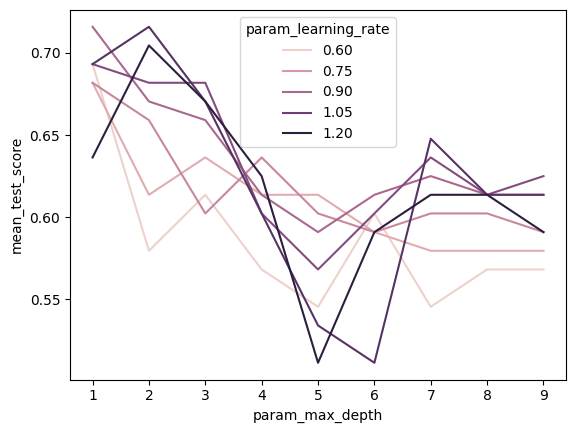

In [13]:
import seaborn as sns
sns.set_palette("tab10")
sns.lineplot(data = results[results["param_learning_rate"] > 0.6], x = "param_max_depth", y = "mean_test_score", hue= "param_learning_rate")


Interestingly, `max_depth` has rapid diminishing returns, but then bounces back a bit at the upper end. `learning_rate`, on the other hand, trends toward the default value, but branches either upward or downward depending on how you've set your depth. In general, it appears that across both my models and those of others in the course, tinkering with the `learning_rate` provided the greatest performance increases in terms of accuracy. Something I would've liked to explore more deeply is the feature selection aspect of building these models, but I wasn't able to get any input from others on how they went about automatically selecting features. 

Now that we have our best values for these two parameters, I want to run one more model with them.



In [71]:
sixth_model = GradientBoostingClassifier(**new_cv.best_params_)
sixth_model.fit(sfs_features, y_train_labels)
sixth_model.score(sfs_features, y_train_labels)

1.0

And the results:

![last](last_model.png)

Well, we're worse of than how we started. I think this is a case where feedback from teammates would've helped a lot, but I still think that has revealed not only the trade-off between hyperp
arameters, but also how even your own testing metrics can still fail to account for all the difficulties of data prediction. With more time, I would really like to revisit this specific competition, and determine how I could better tune my `GradientBoosting` parameters. 